# подготовка данных

Количество уникальных признаков и их перечень:  10 : {'5', '2', '8', '7', '1', '4', '0', '3', '6', '9'}

Статистические сведения о датафрейме:
         pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.00

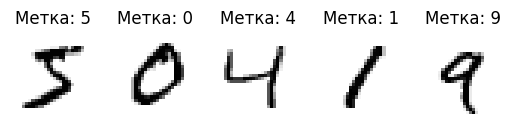

In [6]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# выгружаем набор данных из OpenML
mnist = fetch_openml('MNIST_784', version=1, as_frame=True)
df=mnist.frame

# изучаем данные
print('Количество уникальных признаков и их перечень: ',len(mnist.target.unique()),':',set(mnist.target))
print('\nСтатистические сведения о датафрейме:\n',df.describe())
result_target = df.groupby('class', observed=False)['class'].count()
print('\nПроверка распределения классов:\n',result_target)

X = df.drop('class', axis=1)  # Признаки
y=df['class'] # Метки
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.axis('off')
    plt.imshow(X.iloc[i].values.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Метка: {}'.format(y.iloc[i]))

# создание обучающих наборов для классификатора

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=186)
print('Размер тренеровочного набора признаков: ', X_train.shape)
print('Размер тренеровочного набора меток: ',y_train.shape)

Размер тренеровочного набора признаков:  (56000, 784)
Размер тренеровочного набора меток:  (56000,)


# создание классификаторов:
    Метод опорных векторов (Support Vector Machines)
    Метод k-ближайших соседей (K-Nearest Neighbors)
    Классификатор дерева решений (Decision Tree Classifier)
    Наивный байесовский метод (Naive Bayes)
    Линейный дискриминантный анализ (Linear Discriminant Analysis)


In [10]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

SVC_model = svm.SVC()
KNN_model = KNeighborsClassifier()
DTC_model = DecisionTreeClassifier()
GNB_model = GaussianNB()
LDA_model = LinearDiscriminantAnalysis()

# обучение классификатора

In [13]:
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)
DTC_model.fit(X_train, y_train)
GNB_model.fit(X_train, y_train)
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

# составление прогнозов

In [14]:
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)
DTC_prediction = DTC_model.predict(X_test)
GNB_prediction = GNB_model.predict(X_test)
LDA_prediction = LDA_model.predict(X_test)

# оценка производительности классификатора

Точность метода опорных векторов: 0.9782857142857143
Точность метода k-ближайших соседей: 0.9724285714285714
Точность метода дерева решений: 0.8745
Точность Наивный байесовский метод: 0.5419285714285714
Точность Линейный дискриминантный анализ: 0.8661428571428571

Пример вывода матрицы ошибок и отчёт о классификации для лучшей модели

Отчет метода опорных векторов:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1378
           1       0.99      0.99      0.99      1606
           2       0.98      0.97      0.98      1451
           3       0.97      0.97      0.97      1391
           4       0.98      0.97      0.98      1363
           5       0.97      0.97      0.97      1245
           6       0.99      0.98      0.99      1372
           7       0.98      0.97      0.98      1489
           8       0.97      0.98      0.98      1300
           9       0.96      0.97      0.97      1405

    accuracy                       

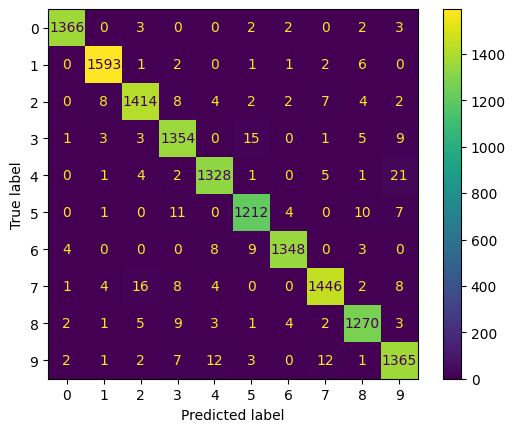

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# оценка точности 
print('Точность метода опорных векторов:',accuracy_score(SVC_prediction, y_test))
print('Точность метода k-ближайших соседей:',accuracy_score(KNN_prediction, y_test))
print('Точность метода дерева решений:',accuracy_score(DTC_prediction, y_test))
print('Точность Наивный байесовский метод:',accuracy_score(GNB_prediction, y_test))
print('Точность Линейный дискриминантный анализ:',accuracy_score(LDA_prediction, y_test))

print('\nПример вывода матрицы ошибок и отчёт о классификации для лучшей модели\n')
print('Отчет метода опорных векторов:\n',classification_report(SVC_prediction, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix(SVC_prediction, y_test))
disp.plot()
plt.show()


# подбор параметра для дерева

In [19]:
from sklearn.model_selection import GridSearchCV  
DTC_model.get_params().keys() 

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])

In [20]:
grid_search= GridSearchCV( DTC_model,
    {"max_depth": [10,20,50]}, 
    cv = 4, # количество ё разбиений на кросс-валидацию
    scoring = 'accuracy' # выбор метрики ошибки
    )

# обучение GridSearchCV на обучающих данных
grid_search.fit(X_train, y_train)

# вывод лучших параметров и соответствующей точности
print("Лучший параметр:", grid_search.best_params_)

Лучший параметр: {'max_depth': 20}


In [21]:
# предсказания на тестовом наборе данных с использованием лучшей модели
best_model = grid_search.best_estimator_
DTC_prediction_best = best_model.predict(X_test)

# качество модели
print('Точность метода с подобранными параметрами:',accuracy_score(DTC_prediction_best, y_test))
print('Точность метода без подобранных параметров:',accuracy_score(DTC_prediction, y_test))


Точность метода с подобранными параметрами: 0.8769285714285714
Точность метода без подобранных параметров: 0.8745
